In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import soaplite
import soaputils as su
import genBasis
import ase
from ase.visualize import view
from ase.build import bulk
import numpy as np
from numpy.linalg import svd
import matplotlib as matplotlib
import matplotlib.pyplot as p
import numpy.linalg as nl
from scipy.optimize import fmin
import scipy.optimize as op
import time
%matplotlib inline

In [2]:
rCut = 10.0
NradBas = 5
Lmax = 5
myAlphas, myBetas = genBasis.getBasisFunc(rCut, NradBas)

In [3]:
struct2 = bulk('Cu', 'fcc', a=3.6, cubic=True)
struct2l = soaplite._get_supercell(struct2, rCut=2.0)
#view(struct2)
#view(struct2l)
mat2 = soaplite.get_periodic_soap_structure(struct2, myAlphas, myBetas, rCut, NradBas, Lmax)
mat2l = soaplite.get_periodic_soap_structure(struct2l, myAlphas, myBetas, rCut, NradBas, Lmax)
#p.matshow(mat2)
#p.matshow(mat2l)

In [4]:
a0 = 4.0
c0 = 0.9 * a0 #https://link.springer.com/content/pdf/10.1007/BF03215214.pdf
struct3 = bulk('Au', 'fcc', a=a0, cubic=True)
struct3.set_cell(np.diag((a0,a0,c0)), scale_atoms=True)
struct3.set_chemical_symbols(('Au','Cu','Cu','Au'))
struct3l = soaplite._get_supercell(struct3, rCut=2.0)
#view(struct3)
#view(struct3l)
mat3 = soaplite.get_periodic_soap_structure(struct3, myAlphas, myBetas, rCut, NradBas, Lmax)
mat3l = soaplite.get_periodic_soap_structure(struct3l, myAlphas, myBetas, rCut, NradBas, Lmax)
#p.matshow(mat3)
#p.matshow(mat3l)

In [5]:
struct4 = ase.io.read(currentdir + "/glass_cube_CuZr.cfg")
struct4r = su.lim_overlap(su.rand_pos(struct4), dmin=1.5) # randomizing positions and limiting overlap
struct4rb = su.lim_overlap(su.rand_pos(struct4), dmin=2)
mat4 = soaplite.get_periodic_soap_structure(struct4, myAlphas, myBetas, rCut, NradBas, Lmax)
mat4r = soaplite.get_periodic_soap_structure(struct4r, myAlphas, myBetas, rCut, NradBas, Lmax)
mat4rb = soaplite.get_periodic_soap_structure(struct4rb, myAlphas, myBetas, rCut, NradBas, Lmax)
#p.matshow(mat4)
#p.matshow(mat4r)
#p.matshow(mat4rb)

20960.255432293652


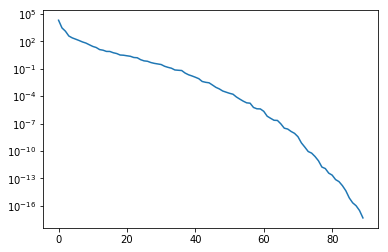

In [6]:
arr = np.random.rand(200,250)
s = svd(mat2l, full_matrices=False, compute_uv=False)
p.semilogy(s)
print(np.linalg.norm(s))

In [7]:
#N = 100
#res = np.zeros(N)
#for i in np.arange(N):
    #temp_struct = su.rand_pos(struct2l)
    #temp_mat = soaplite.get_periodic_soap_structure(temp_struct, myAlphas, myBetas, rCut, NradBas, Lmax)
    #s = svd(temp_mat, full_matrices=False, compute_uv=False)
    #res[i] = np.linalg.norm(s)
#print(res)

Number of Atoms: 30
Singular-Value norm: 318.855584
Time passed: 95.093744 s
Iterations: 125
Singular-Value norm: 133.969430


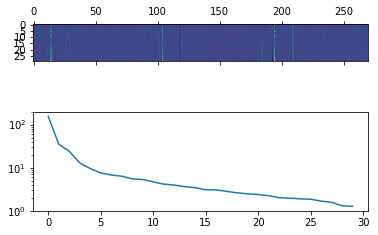

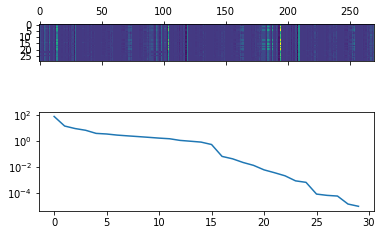

In [11]:
atoms_test = struct4.copy()
atoms_test.set_cell(10 * np.identity(3))
atoms_test = su.limit_pos(atoms_test)
x0 = su.rand_pos(atoms_test).get_positions()
t0 = time.time()
N = len(atoms_test.get_positions())*3
print('Number of Atoms: %i' %(N/3))
bounds_obj = [(0,10)]*N
su.show_res(atoms_test, x0, myAlphas, myBetas, rCut=10.0, NradBas=5, Lmax=5, pbc=True)
op_options = {'maxiter': 50000, 'disp': True}
res_obj = op.minimize(su.svd_l2, x0, method='L-BFGS-B',args=(atoms_test, myAlphas, myBetas, rCut, NradBas, Lmax, True),bounds=bounds_obj,  options=op_options)
t1 = time.time()
dt = t1 - t0
print('Time passed: %f s' %dt)
print('Iterations: %i' %res_obj.nit)
xopt = res_obj.x
su.show_res(atoms_test, xopt, myAlphas, myBetas, rCut=10.0, NradBas=5, Lmax=5, pbc=True)

In [9]:
atoms_test = struct4.copy()
atoms_test.set_cell(10 * np.identity(3))
atoms_test = su.limit_pos(atoms_test)
atoms_test = su.rand_pos(atoms_test)
x0 = atoms_test.get_positions()
mat_test = soaplite.get_soap_structure(atoms_test, myAlphas, myBetas, rCut, NradBas, Lmax)
s = svd(mat_test.transpose(), full_matrices=False, compute_uv=False)
s_test = su.svd_l2(x0, atoms_test, myAlphas, myBetas, rCut, NradBas, Lmax)
print(np.linalg.norm(s))
print(s_test)
print(np.linalg.norm(mat_test))
print(s)

40.69690472539687
132.62224908252568
40.69690472539687
[32.751257   14.39181566  8.6812257   8.11835372  6.57176622  5.66456221
  4.64986078  4.14116037  3.87231629  3.80579733  3.45358548  3.32408159
  3.01005344  2.71260074  2.62230844  2.44611865  2.40015245  2.30342713
  2.14834794  1.96528716  1.87222155  1.79680218  1.69966872  1.61659519
  1.43971586  1.30615528  1.20094592  1.07395583  0.86577155  0.71633873]


In [10]:
arr = np.random.rand(200,250)
s = svd(arr.transpose(), full_matrices=False, compute_uv=False)
print(np.linalg.norm(arr))
print(np.linalg.norm(s))

128.942612450013
128.942612450013
